
# Project for Data Processing Workshop III

## By Dr. Zhe Xuanyuan


## Modified from Udacity Neural Network tutorials

www.udacity.com


## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. 

There are four steps:

> Step 1: Load The Data

> Step 2: Dataset Summary & Exploration

> Step 3: Design and Test a Model Architecture

> Step 4: Test a Model on New Images

If you see "TODO: ", it means you need to finish the unfinished codes and run the block to see if its output is as expected.

If you see "COMMENTS: ", it means you need to read and understand the provided codes and write comments and explanation of the codes.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a report to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. In the report, you need to describe at least two problem encountered in setting up the development environment and implementing the codes, and the solutions to them.

In order to stand out for your project, you may also try to answer the following questions in your report:
- What is the accuracy of your model?
- How to increase the accuracy of your model?
- Can you use the model to classify other objects as well? What is the workflow?
- Can you use other models to classify the traffic signs? How to use new models?

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 1: Load The Data

- Download the data from 

> link: https://pan.baidu.com/s/1nrXQvs0EGI3bmK6jeN2nAw 

> code: 4eqc 

- put the data somewhere in your file system, e.g., the same fold with this notebook file
- the .p files are images and labels compressed together in a single file for convinient access

In [1]:
#https://mathpretty.com/10675.html
#https://www.cnblogs.com/ltkekeli1229/p/17141717.html
#https://www.aiuai.cn/aifarm1335.html

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
path = 'traffic-signs-data/'
training_file = path + "train.p"
validation_file= path + "valid.p"
testing_file = path + "test.p"

#  COMMENTS: load dataset into program.
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#  COMMENTS: separate X and Y from each dataset.
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# COMMENTS: validate whether size of X and Y are similar.
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


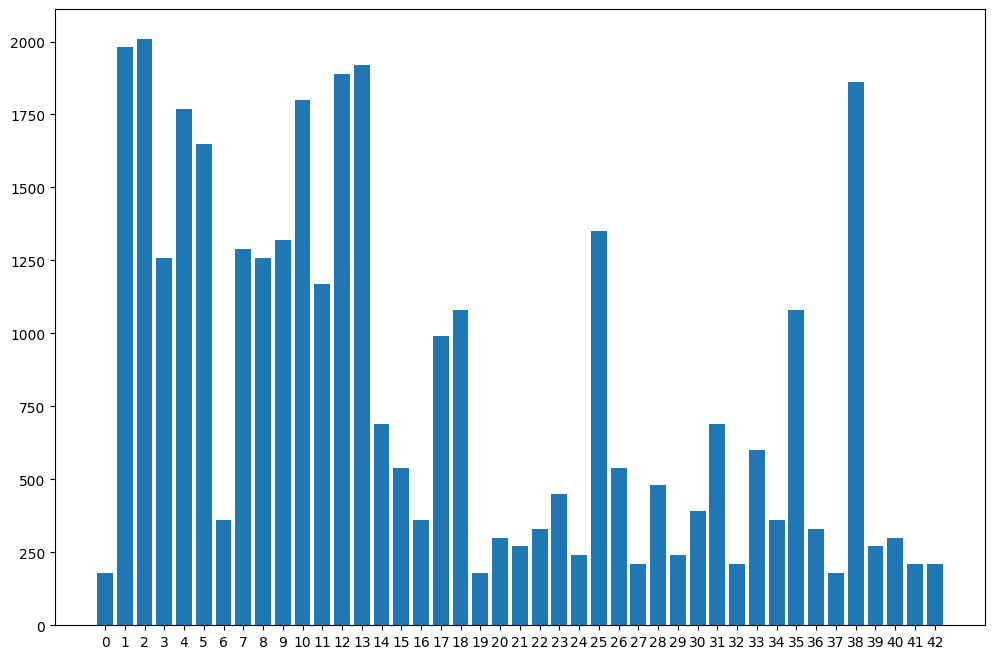

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset. Try "np.unique"
n_classes = len(np.unique(y_train))

# TODO: What are the IDs of the classes, how many samples of each class are in the training set. Try "np.unique".
# class_id -- ID of each class.
# class_counts -- number of sample of each class.
class_id, class_counts = np.unique(y_train), np.bincount(y_train)

# print out result to check.
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(class_id)
print(class_counts)

#TODO: Draw a bar chart that shows the number of samples of each class in training set, try plt.bar() and plt.show()
plt.figure(figsize = (12, 8))
plt.bar(class_id, class_counts)
plt.xticks(class_id)
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

4


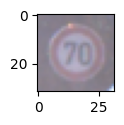

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.

# COMMENTS: randomly choose one data from training set.
index = random.randint(0,len(X_train)-1)
image = X_train[index]

# plot the selected data.
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
#plt.imshow(image)

# COMMENTS: show the corresponding index of selected data.
print(y_train[index])

----

## Step 3: Implement and Test a Model Architecture

Implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).


Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

4


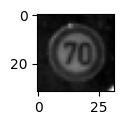

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization,
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

# This function uses OpenCV library to convert RGB color images into gray scale images,
# which contain only one color channel.
def grayscale(img):
    grayimg = np.zeros((32,32,1))
    grayimg[:,:,0]=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return grayimg

#X_train, y_train = shuffle(X_train, y_train)

# COMMENTS: initialize arrays which used to store the gray scale images of data.
X_train_gray = np.zeros((len(X_train),32,32,1))
X_valid_gray = np.zeros((len(X_valid),32,32,1))
X_test_gray = np.zeros((len(X_test),32,32,1))


# COMMENTS: for each data, convert it from RGB image to gray scale image.
for i in range(len(X_train)):
    X_train_gray[i] = grayscale(X_train[i])
    
for i in range(len(X_valid)):
    X_valid_gray[i] = grayscale(X_valid[i])
    
for i in range(len(X_test)):
    X_test_gray[i] = grayscale(X_test[i])

# ! here we takes 0, since the gray scale image only has one channel.
image = X_train_gray[index][: ,: , 0]
#print(X_train[index].shape())
plt.figure(figsize=(1,1))

# COMMENTS: print the selected data to check, 
# whether it has convert to gray scale image.
plt.imshow(image, cmap="gray")
print(y_train[index])

### TensorFlow setup

In [6]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

2023-05-15 10:47:02.784091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(-1989.5809, shape=(), dtype=float32)


2023-05-15 10:47:11.907511: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
#COMMENT: import the tensorflow package
# pip install --upgrade tensorflow==1.15 -i https://pypi.tuna.tsinghua.edu.cn/simple 
# tensorflow 1.x only works for python version <= 3.7.x
# if your python version is >= 3.8, you cannot install tensorflow 1.x
#import tensorflow as tf

# or if you have tensorflow 2.x, you can do the following
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# COMMENT: defined the training epochs and batch_size parameters.
# EPOCHS -- the number times that the learning algorithm will work through the entire training dataset.
# BATCH_SIZE -- size of training set.
EPOCHS = 100
BATCH_SIZE = 256

Instructions for updating:
non-resource variables are not supported in the long term


### Model Architecture

In [8]:
# COMMENTS: What is this code block doing in general? 
# this code block is the architecture of LeNet, which is a CNN.
def flatten(incoming, name=None):
    flat_shape = [-1, np.prod(incoming.shape[1:]).value]
    return tf.reshape(incoming, flat_shape)
#from tensorflow.contrib.layers import flatten

global_conv2 = tf.zeros((1,5,5,16))

def LeNet(x):    
    global global_conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    # conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    global_conv2 = conv2
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)

    # Layer 4: Fully Connected. Input = 240. Output = 120.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.5)

    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, 0.5)

    # Layer 6: Fully Connected. Input = 84. Output = n_classes （43 here, number of classes).
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    return logits

## Features and Labels

In [9]:
# COMMENTS: convert data into one-hot coder.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [10]:
# learning rate parameter。
rate = 0.001

# COMMENTS: forward propagation.
logits = LeNet(x)

# COMMENTS: calculate cross entropy which as loss funciton.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( logits=logits,  labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# COMMENTS: use AdamOptimizer to minimize the loss function.
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
### Train the model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

2023-05-15 10:47:13.212651: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Training...

EPOCH 1 ...
Validation Accuracy = 0.076

EPOCH 2 ...
Validation Accuracy = 0.221

EPOCH 3 ...
Validation Accuracy = 0.364

EPOCH 4 ...
Validation Accuracy = 0.467

EPOCH 5 ...
Validation Accuracy = 0.553

EPOCH 6 ...
Validation Accuracy = 0.616

EPOCH 7 ...
Validation Accuracy = 0.661

EPOCH 8 ...
Validation Accuracy = 0.680

EPOCH 9 ...
Validation Accuracy = 0.715

EPOCH 10 ...
Validation Accuracy = 0.737

EPOCH 11 ...
Validation Accuracy = 0.749

EPOCH 12 ...
Validation Accuracy = 0.761

EPOCH 13 ...
Validation Accuracy = 0.780

EPOCH 14 ...
Validation Accuracy = 0.788

EPOCH 15 ...
Validation Accuracy = 0.803

EPOCH 16 ...
Validation Accuracy = 0.810

EPOCH 17 ...
Validation Accuracy = 0.813

EPOCH 18 ...
Validation Accuracy = 0.822

EPOCH 19 ...
Validation Accuracy = 0.823

EPOCH 20 ...
Validation Accuracy = 0.838

EPOCH 21 ...
Validation Accuracy = 0.843

EPOCH 22 ...
Validation Accuracy = 0.854

EPOCH 23 ...
Validation Accuracy = 0.859

EPOCH 24 ...
Validation Accura

## Test on the test set

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.907


---

## Step 4: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


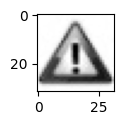

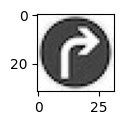

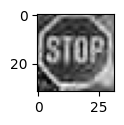

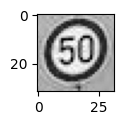

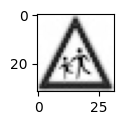

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np
import cv2
import matplotlib.image as mpimg

#TODO: put the images you downloaded into the "online-images" folder, which is located in the same folder as this notebook
new_images = [str(i) + '.jpg' for i in range(1, 6)]
print(new_images)

new_image_data = np.zeros(len(new_images)).tolist()
new_image_data = list(np.zeros(len(new_images)))
new_image_gray = list(np.zeros(len(new_images)))

#TODO: check signnames.csv file and specify the class of your 5 downloaded traffic signs in the vector below
y_new_image = [18, 33, 14, 2, 28]

# COMMENTS: using new data to test performance of model.
for i in range(len(new_images)):
    new_image_name = "online-images/" + new_images[i]
    new_image_data[i] = cv2.imread(new_image_name) 
    image = new_image_data[i]
    print(image.shape)
    #cv2.namedWindow("image")
    #cv2.imshow("image", image)

    image = new_image_data[i].astype(np.uint16)
    
    new_image_gray[i] = grayscale(image)
    image = new_image_gray[i][:,:,0]
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction_sign = tf.argmax(logits,1)
correct_prediction = tf.equal(prediction_sign, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def predict_sign(X_data, y_data):
    num_examples = len(X_data)
    sign_class = np.zeros(len(X_data))
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        sign_class = sess.run(prediction_sign, feed_dict={x: batch_x, y: batch_y})
    return sign_class 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_signs = predict_sign(new_image_gray, y_new_image)
    print("The signs in the pics are : ")
    print(new_test_signs)
    
# correct answer： 18 33 14 2 28

INFO:tensorflow:Restoring parameters from ./lenet
The signs in the pics are : 
[18 33 14  1 28]


### Analyze Performance

In [16]:
### TODO: Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
new_image_accuracy = (len(set(new_test_signs) & set(y_new_image))) / len(y_new_image)
print(new_image_accuracy)

0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    a = sess.run(logits, feed_dict={x:new_image_gray})
    topk = sess.run(tf.nn.top_k(tf.constant(a), k=5))
    print(topk)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[41.929123 , 28.977392 , 22.31434  , 18.70497  , 15.431139 ],
       [37.623398 , 16.951078 , 12.458246 , 12.432453 , 11.751331 ],
       [12.808    , 12.544374 , 10.527573 ,  8.840849 ,  6.2148223],
       [ 9.68649  ,  8.298376 ,  7.59853  ,  5.0168266,  4.907057 ],
       [12.960703 ,  6.4492555,  2.841895 ,  2.111414 ,  1.0652971]],
      dtype=float32), indices=array([[18, 26, 37, 15, 27],
       [33, 35, 14, 15, 12],
       [14, 28, 35, 33, 29],
       [ 1, 40, 12,  2,  4],
       [28, 20, 16, 26, 39]], dtype=int32))


---

## Step 5: Extension for Mini Project
Tasks:

1. Find out which class has the highest classification accuracy and which has the lowest.

2. Derive a confusion matrix of the traffic sign classification result on the testing set, draw a subset of the confusion matrix if it is to big to fit in the screen. (for example, you can take 10 out of the total classes and draw it)

3. For the classes that have low classification accuracy, to which classes are they mis-classified most? Can you do some analysis and give some possible reasons why it is the case? (Hint: check those pictures that are mis-classified to other classes, do they look similar? Are the quality of pictures low? ...)

Deliverables: A jupyter notebook that contain the codes, results and analysis of the above three tasks.

In [19]:
# predict the sign and output the possible result
def predict_sign_all(X_data, y_data):
    sample_num = len(X_data)
    sign_class = np.zeros(sample_num)
    sess = tf.get_default_session()
    
    prediction_sign = tf.argmax(logits,1)
    
    sign_class = sess.run(prediction_sign, feed_dict={x: X_data, y: y_data})
    return sign_class 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = predict_sign_all(X_test_gray, y_test)
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.906


In [ ]:
'''Task 1, 2'''
'''
    1. Find out which class has the highest classification accuracy and which has the lowest.

    2. Derive a confusion matrix of the traffic sign classification result on the testing set.
'''
'''Here we calculate confusion matrix first.'''

'Here we calculate confusion matrix first.'

### First, we draw the confusion matrix according to number of prediction.

Confusion Matrix with number of T/F:
[[  2   5   0 ...   0   0   0]
 [  4 553  57 ...   3   0   0]
 [  0  52 644 ...  11   0   0]
 ...
 [  0   0   0 ...   7   0   0]
 [  0   0   0 ...   0  20  10]
 [  0   0   0 ...   0   1   8]]


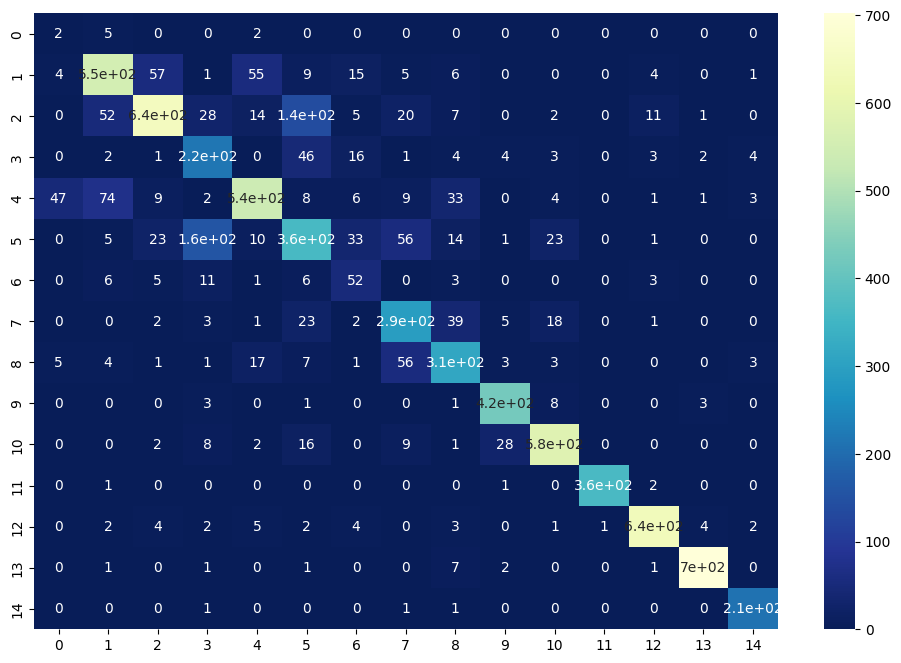

In [ ]:
# use number of T/F prediction to draw confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

# assume y_true and y_pred are the true and predicted labels of the testing set.
cm = confusion_matrix(y_pred, y_test, labels=class_id)

# if the confusion matrix is too big to fit on the screen, take a subset of it.
# random.randint()
if cm.shape[0] > 15:
    # cm_rand = random.sample(cm, 10)
    cm_15 = cm[:15, :15]

print('Confusion Matrix with number of T/F:')
print(cm)

# plot the confusion matrix.ß
plt.figure(figsize=(12, 8))
sns.heatmap(cm_15, annot=True, cmap="YlGnBu_r")
plt.show()

### Then, we calculate the precision, draw confusion matrix accoring to it.

Confusion Matrix With Precision: 
[[0.167 0.417 0.    ... 0.    0.    0.   ]
 [0.005 0.731 0.075 ... 0.004 0.    0.   ]
 [0.    0.055 0.682 ... 0.012 0.    0.   ]
 ...
 [0.    0.    0.    ... 0.318 0.    0.   ]
 [0.    0.    0.    ... 0.    0.435 0.217]
 [0.    0.    0.    ... 0.    0.042 0.333]]


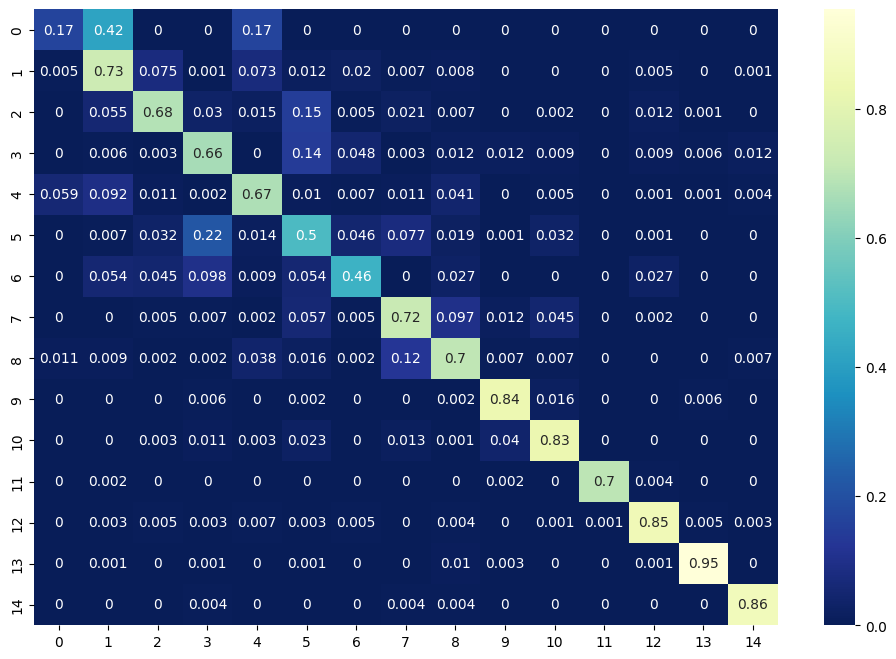

In [ ]:
# use the precision to draw confusion matrix.
pre_cm = np.empty(cm.shape)
for i in range(cm.shape[0]):
    # pre_cm[i,:] = (cm[i]/np.sum(cm[i]))
    pre_cm[i,:] = np.around((cm[i]/np.sum(cm[i])), decimals=3)
    
# print out the result.
# pre_cm = np.around(pre_cm, decimals=3)
print("Confusion Matrix With Precision: ")
print(pre_cm)

# if the confusion matrix is too big to fit on the screen, take a subset of it
if pre_cm.shape[0] > 15:
    pre_cm = pre_cm[:15, :15]

# plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pre_cm, annot=True, cmap="YlGnBu_r")
plt.show()

### Calculate accuracy of each class.

In [ ]:
# use precision and F1 score,
# find out which class has the highest classification accuracy and which has the lowest.
import pandas as pd
# get each precision
def precision(data,index):
    precision_res = data[index,index]/sum(data[index,:])
    return precision_res

# Get each F1-score to see the performance
def calculate_F1(data,index):
    recall = data[index,index]/sum(data[:,index])
    precision_res = precision(data, index)
    # precision_res = data[index,index]/sum(data[index,:])
    return 2*recall*precision_res/(recall+precision_res)

F1_list = []
precision_list = []
for i in range(cm.shape[0]):
# for i in range(len(class_counts)):
    F1_list.append(calculate_F1(cm, i))
    precision_list.append(precision(cm, i))

res_df = pd.DataFrame({
                       'Class': class_id.tolist(), 
                       'F1-score': np.around(F1_list, decimals=4),
                       'Precision': np.around(precision_list, decimals=4)
                       })
F1_rank_df = res_df.sort_values(by="F1-score", ascending=False)
Precision_rank_df = res_df.sort_values(by="Precision", ascending=False)

/var/folders/8w/sn11s_wx5kbgmhv0z3gpxttw0000gn/T/ipykernel_33871/328101793.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return 2*recall*precision_res/(recall+precision_res)


In [ ]:
print("Highest Accuarcy Class:\n", Precision_rank_df.iloc[0])
print('========================')
print("Lowest Accuarcy Class:\n", Precision_rank_df.iloc[-1])

Highest Accuarcy Class:
 Class        17.0000
F1-score      0.9260
Precision     0.9696
Name: 17, dtype: float64
Lowest Accuarcy Class:
 Class        19.0
F1-score      NaN
Precision     0.0
Name: 19, dtype: float64


In [ ]:
# Other Method:

# assume cm is the confusion matrix
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)

highest_accuracy_class = np.argmax(class_accuracies)
lowest_accuracy_class = np.argmin(class_accuracies)

print(f"Highest Accuracy Class: {highest_accuracy_class}")
print(f"Lowest Accuracy Class: {lowest_accuracy_class}")

Highest Accuracy Class: 17
Lowest Accuracy Class: 19


### Print out the classes that have highest or lowest precision/F1-Score

In [ ]:
# print out top 5 classes that has highest score.
print('Top 5 Classes have highest Precision:')
display(Precision_rank_df[:5])
# display(Precision_rank_df.head())
print('Top 5 Classes have highest F1-Score:')
display(F1_rank_df[:5])

Top 5 Classes have highest Precision:


,Class,F1-score,Precision
17,17,0.9260,0.9696
13,13,0.9643,0.9538
38,38,0.9104,0.9226
35,35,0.8642,0.8803
14,14,0.8187,0.8642


Top 5 Classes have highest F1-Score:


,Class,F1-score,Precision
13,13,0.9643,0.9538
17,17,0.9260,0.9696
38,38,0.9104,0.9226
12,12,0.8856,0.8535
35,35,0.8642,0.8803


In [ ]:
# print out top 5 classes that has lowest score.
print('Top 5 Classes have lowest Precision:')
display(Precision_rank_df.iloc[-5:])
print('Top 5 Classes have lowest F1-Score:')
display(F1_rank_df.iloc[-5:])

Top 5 Classes have lowest Precision:


,Class,F1-score,Precision
27,27,0.1013,0.2105
20,20,0.1576,0.1733
0,0,0.0556,0.1667
24,24,0.0537,0.0678
19,19,NaN,0.0000


Top 5 Classes have lowest F1-Score:


,Class,F1-score,Precision
40,40,0.1250,0.3182
27,27,0.1013,0.2105
0,0,0.0556,0.1667
24,24,0.0537,0.0678
19,19,NaN,0.0000


In [ ]:
def get_false_list(cm, class_id, type_lab):
    # processing the fault dataframe to the right form.
    false_df = pd.DataFrame({'Class': class_id.tolist(), '# False Prediction': cm[type_lab,:]})
    sorted_false_df = false_df.sort_values(by='# False Prediction', ascending=False)
    sorted_false_df["%"] = ((sorted_false_df['# False Prediction'] / sum(sorted_false_df['# False Prediction']))*100).round(4)
    
    # remove the label which the class name is the same as the i.
    sorted_false_df = sorted_false_df[1:]
    return sorted_false_df

# getting the class.
lowest_class_list = Precision_rank_df.iloc[-5:].loc[:,"Class"].tolist()

# getting each worst class label situation.
false_list = []
for i in lowest_class_list:
    print("Class", i)
    
    false_df = get_false_list(cm, class_id, i)
    display(false_df.head())
    
    # append the wrong label class.
    false_list.extend(false_df["Class"])

Class 27


,Class,# False Prediction,%
18,18,4,21.0526
27,27,4,21.0526
32,32,1,5.2632
21,21,1,5.2632
22,22,1,5.2632


Class 20


,Class,# False Prediction,%
28,28,8,10.6667
26,26,6,8.0000
23,23,6,8.0000
24,24,5,6.6667
13,13,4,5.3333


Class 0


,Class,# False Prediction,%
0,0,2,16.6667
4,4,2,16.6667
38,38,1,8.3333
27,27,1,8.3333
15,15,1,8.3333


Class 24


,Class,# False Prediction,%
30,30,8,13.5593
18,18,7,11.8644
23,23,5,8.4746
20,20,5,8.4746
26,26,4,6.7797


Class 19


,Class,# False Prediction,%
21,21,1,16.6667
3,3,1,16.6667
11,11,1,16.6667
41,41,1,16.6667
40,40,0,0.0000


In [ ]:
# Find the characteristics of the category that was misclassified,
# which sorted by its frequency.
wrong_feq=[]
class_list = list(range(0,15,1))
for i in set(false_list):
    wrong_feq.append(false_list.count(i))

C_false_df = pd.DataFrame({'False Class':list(set(false_list)), 'Appear Freq':wrong_feq})
C_false_df_rank = C_false_df.sort_values(by="Appear Freq",ascending=False)
C_false_df_rank.head()

,False Class,Appear Freq
0,0,5
33,33,5
25,25,5
26,26,5
27,27,5


In [ ]:
'''Task 3'''
'''
    find out for the classes that have low classification accuracy,
    to which classes are they mis-classified most?
    Do some analysis and give some possible reasons why it is the case?
'''

'\n    find out for the classes that have low classification accuracy,\n    to which classes are they mis-classified most?\n    Do some analysis and give some possible reasons why it is the case?\n'

1. find out the number of each training categories.

In [ ]:
# use X_train and y_train to store trainig data.
X_train, y_train = train['features'], train['labels']

for i in set(y_train):
    print('Class: ', i)
    print('Number of Samples: ', len(X_train[i]))

Class:  0
Number of Samples:  32
Class:  1
Number of Samples:  32
Class:  2
Number of Samples:  32
Class:  3
Number of Samples:  32
Class:  4
Number of Samples:  32
Class:  5
Number of Samples:  32
Class:  6
Number of Samples:  32
Class:  7
Number of Samples:  32
Class:  8
Number of Samples:  32
Class:  9
Number of Samples:  32
Class:  10
Number of Samples:  32
Class:  11
Number of Samples:  32
Class:  12
Number of Samples:  32
Class:  13
Number of Samples:  32
Class:  14
Number of Samples:  32
Class:  15
Number of Samples:  32
Class:  16
Number of Samples:  32
Class:  17
Number of Samples:  32
Class:  18
Number of Samples:  32
Class:  19
Number of Samples:  32
Class:  20
Number of Samples:  32
Class:  21
Number of Samples:  32
Class:  22
Number of Samples:  32
Class:  23
Number of Samples:  32
Class:  24
Number of Samples:  32
Class:  25
Number of Samples:  32
Class:  26
Number of Samples:  32
Class:  27
Number of Samples:  32
Class:  28
Number of Samples:  32
Class:  29
Number of Sam

And here we can find that all classes have similar number of samples, so the quality of images is matter.

### 2. find out the image quality of training set.

In [ ]:
# analyse image quality of the training set
# for those classes has lowest precision.
def plot_25_image(X_train, y_train, class_name):
    # X_train : (34799, 32, 32, 3)
    # y_train : (34799)

    y_train_select = [1 if n == class_name else 0 for n in y_train]
    label_image = np.array(X_train)[np.array(y_train_select).astype(bool)].tolist()
    
    image_select = random.sample(range(sum(np.array(y_train_select))), 25)
    
    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(8,8))
    
    count = 0
    
    for row in range(5):
        for col in range(5):
            #绘制数字图像,cmap设置绘制风格为白底黑字
            #ax_array[row, col].imshow(label_image[image_select[count]])
            ax_array[row, col].matshow(label_image[image_select[count]], cmap='gray_r')
            #去除刻度，保证美观
            plt.xticks([])
            plt.yticks([])
            count += 1 
    plt.show()


Print some of images which corresponding to classes have low accuracy.

Class 14


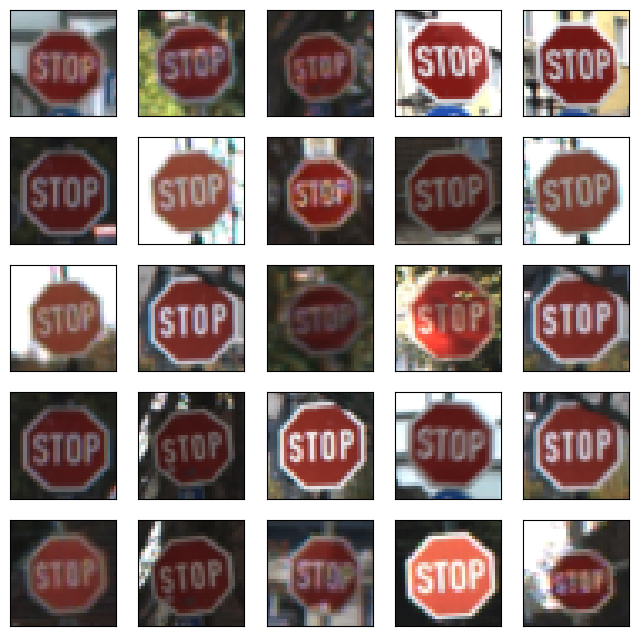

Class 35


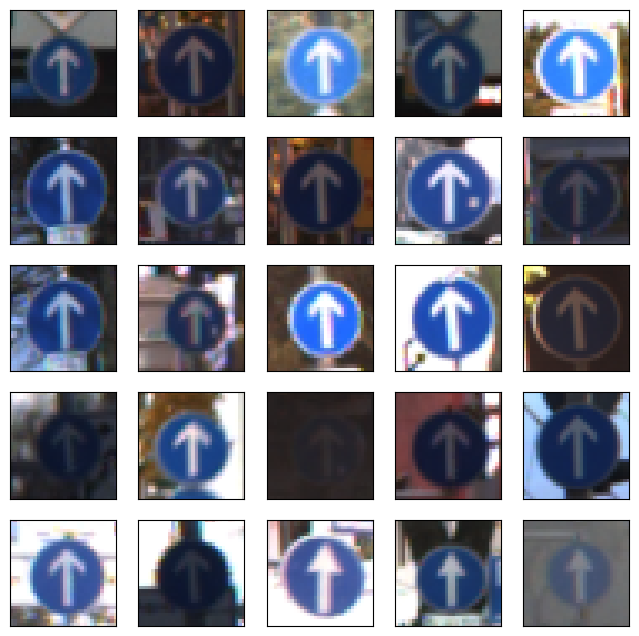

Class 38


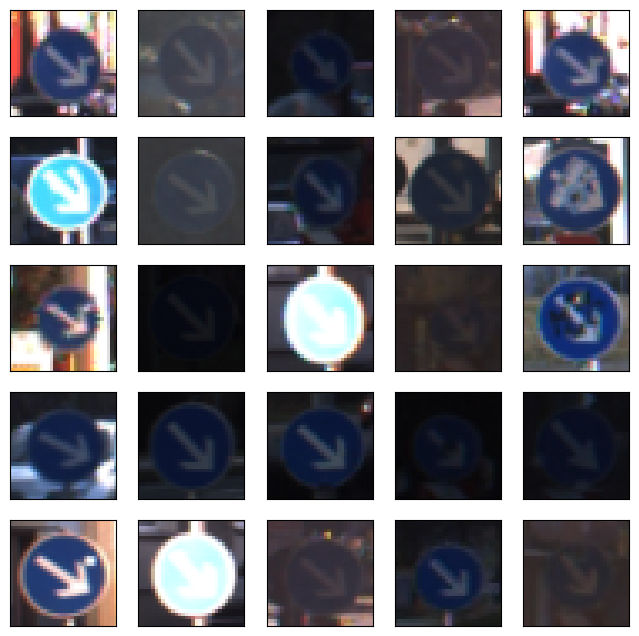

Class 13


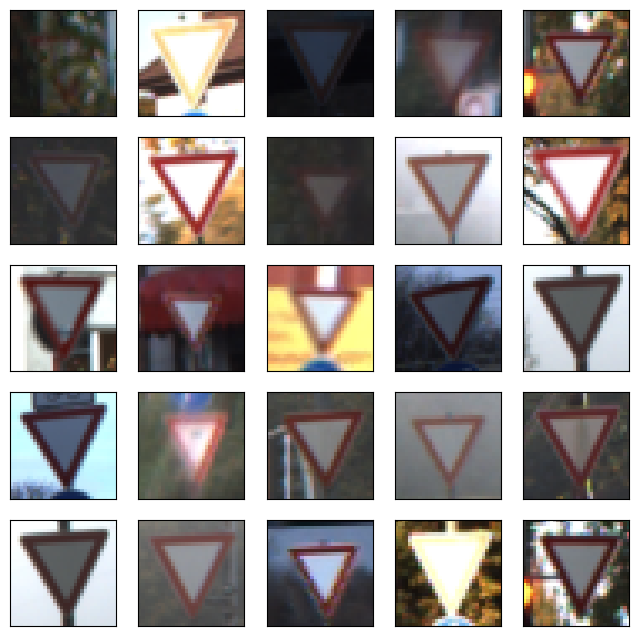

Class 17


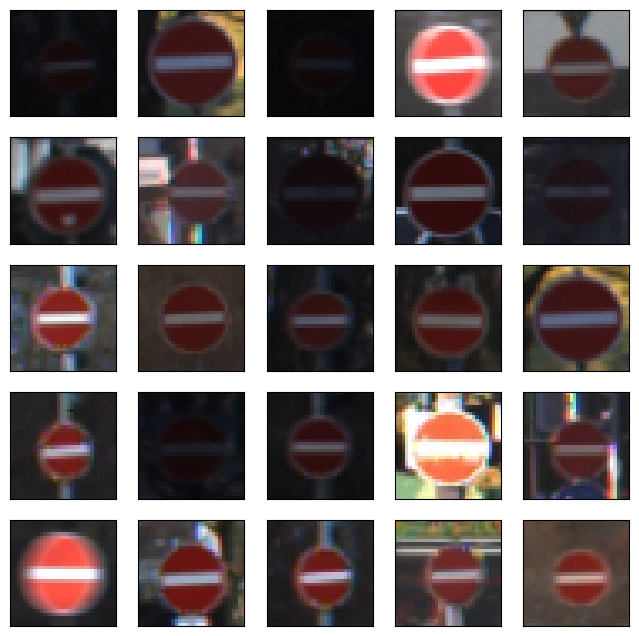

In [ ]:
# Misclassified categories
for i in lowest_class_list:
    print("Class", i)
    plot_25_image(X_train, y_train, i)

The training set with corresponding class 0


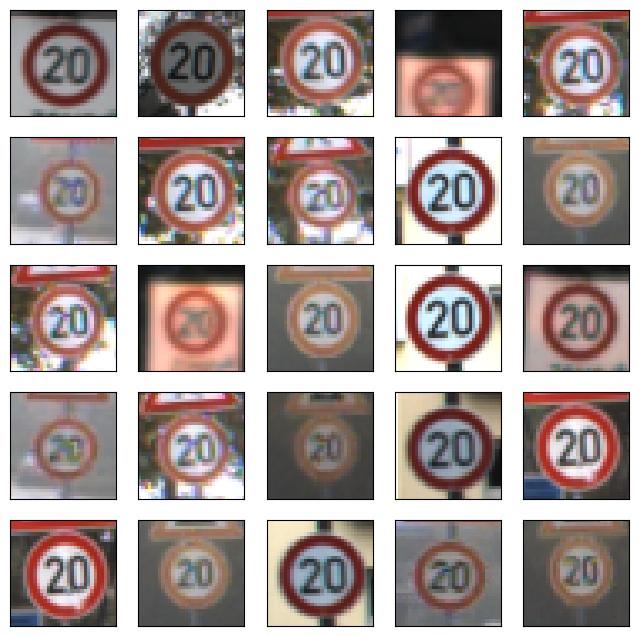

The training set with corresponding class 1


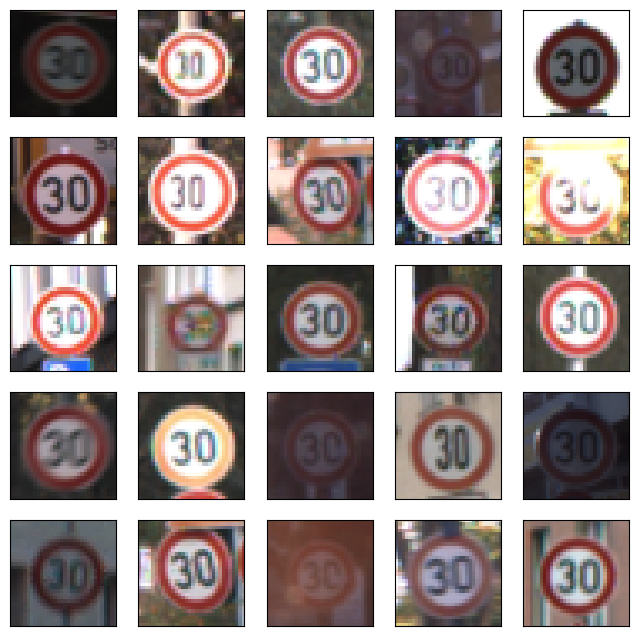

The training set with corresponding class 23


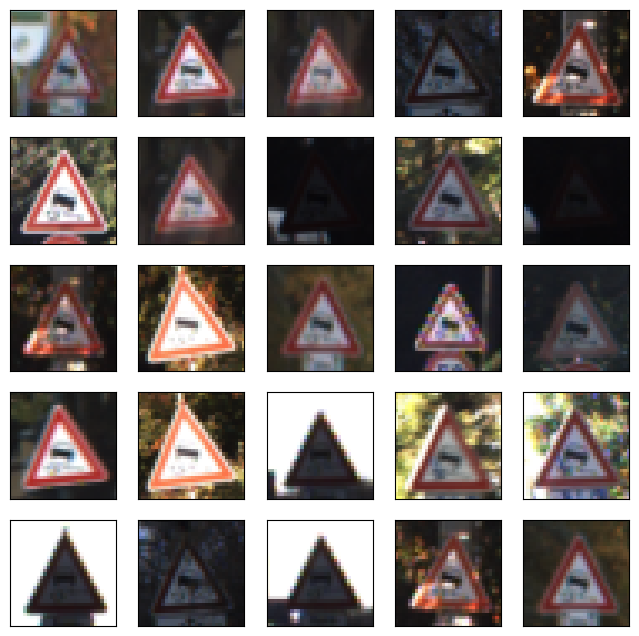

The training set with corresponding class 24


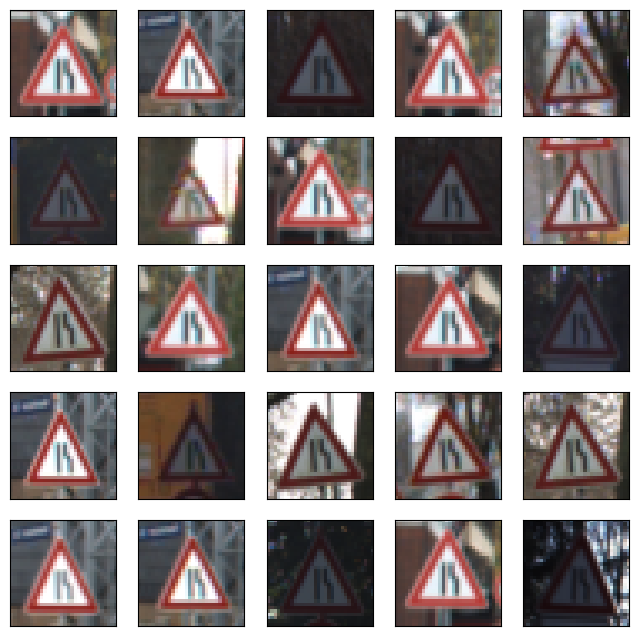

The training set with corresponding class 25


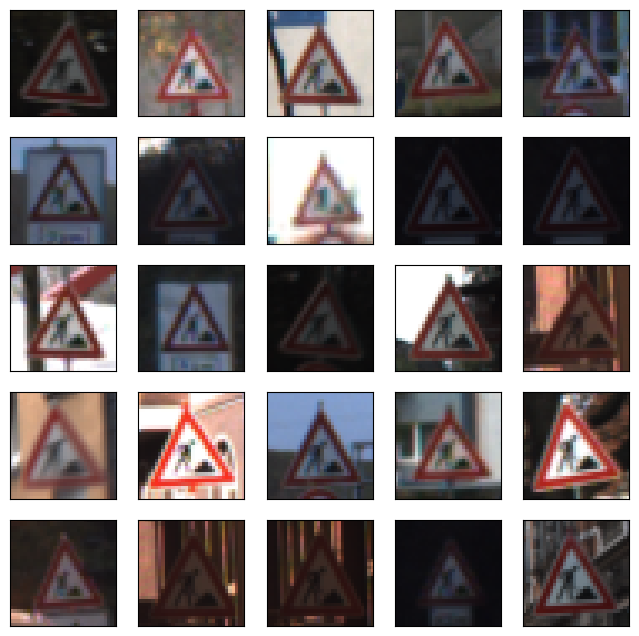

In [ ]:
# Misclassified categories
list_wrong = C_false_df_rank.head()["False Class"].tolist()
for i in list_wrong:
    print("Class", i)
    plot_25_image(X_train, y_train, i)

As we can see, the quality of images are not good.

Some of images are dark or have bright background, makes it hard for model to capture key features.

### 3. check the relationship between truth class and misclassfied classes.

here we firstly select classes that be most misclassfied, and print out its image.

,Class,# False Prediction,%
18,18,4,21.0526
27,27,4,21.0526
32,32,1,5.2632
21,21,1,5.2632
22,22,1,5.2632


Truth Class 27


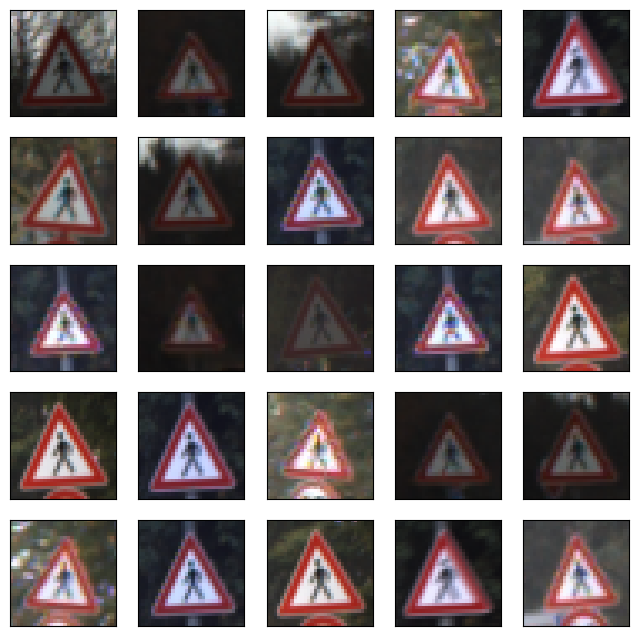

False Predicted Class 0


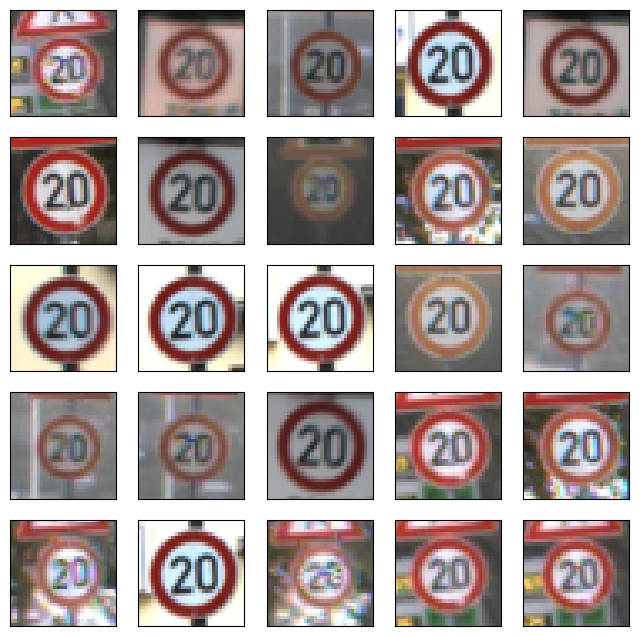

False Predicted Class 1


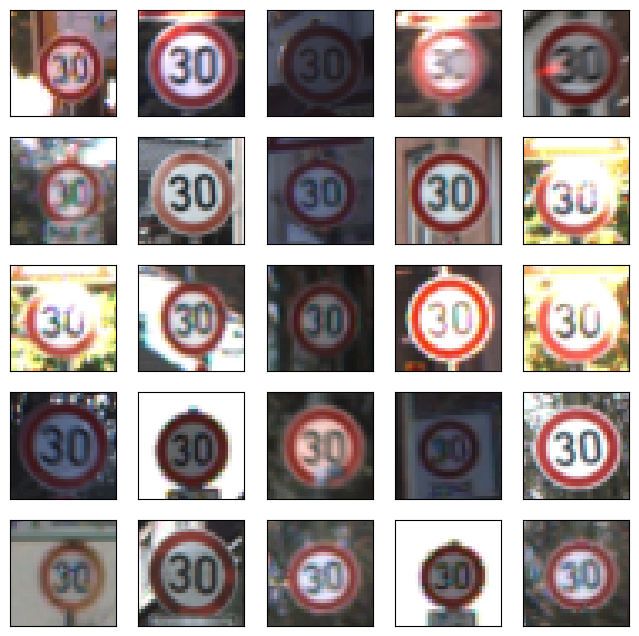

False Predicted Class 23


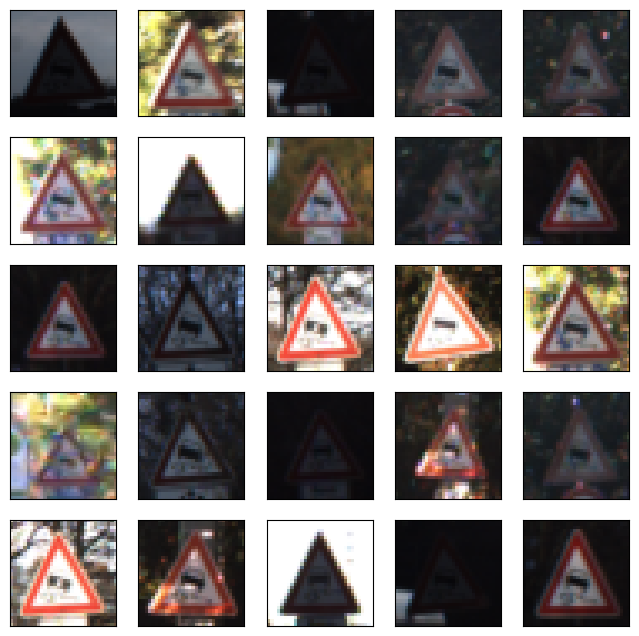

False Predicted Class 24


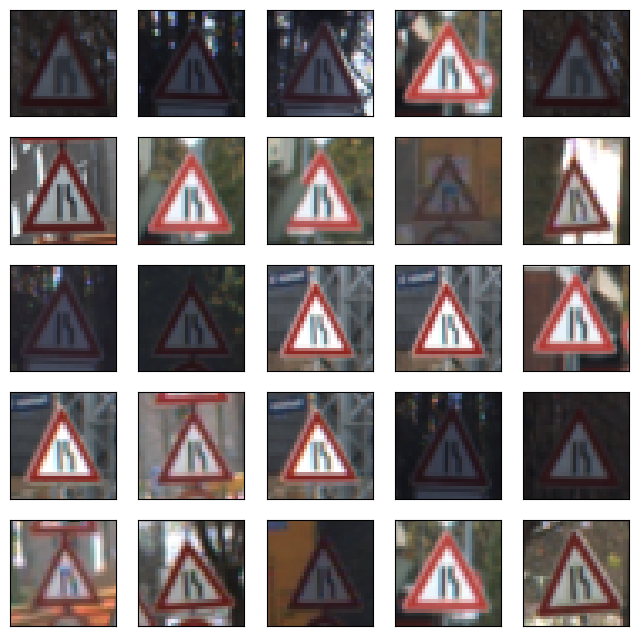

False Predicted Class 25


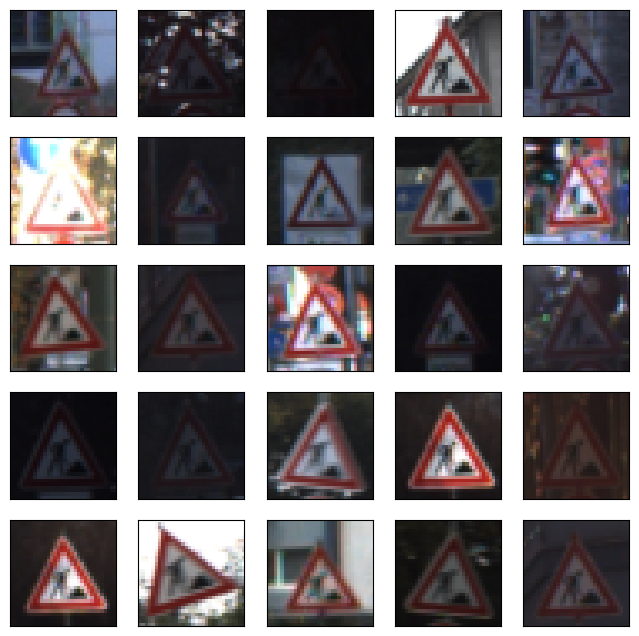

In [ ]:
i = lowest_class_list[0]
fault_df = get_false_list(cm,class_id,i)
display(fault_df.head())
fault_df.head()["Class"].tolist()

print("Truth Class", i)
plot_25_image(X_train, y_train, i)
    
for each in list_wrong:
    print("False Predicted Class",each)
    plot_25_image(X_train, y_train, each)

First, when we check class 27, which has low accuracy, as we can see, the image is kind of complex and not very clear.

When we check classes that image in class 27 are misclassified to, And we can find some of class are not clear very complex, so it seems similar to class 27. So the images in class 27 will tend to be misclassified to these classes.